In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib as pl

Visualizar una imagen

In [23]:
file = '/vision/data/invoices/1/16.jpg'
plt.rcParams["figure.figsize"] = (40,20)

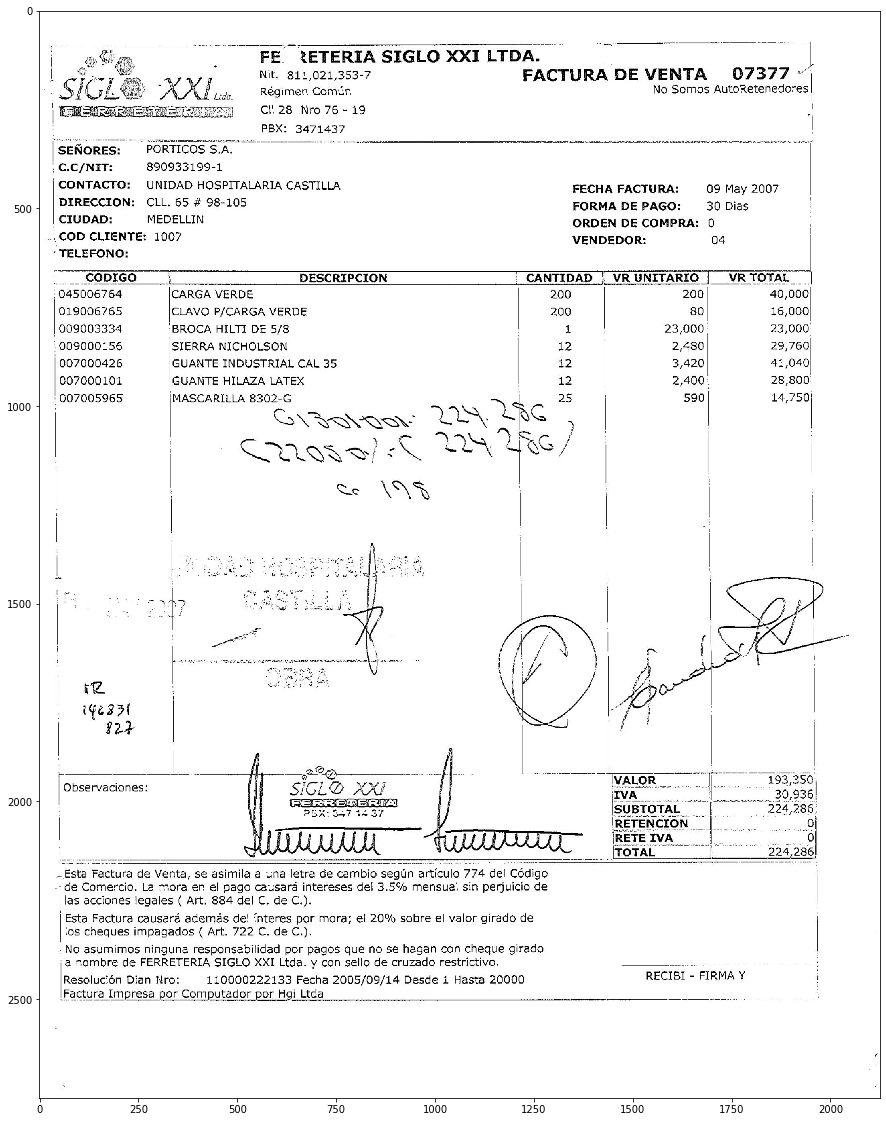

In [3]:
plt.imshow(
    tf.image.decode_jpeg(
        tf.io.read_file(file)))

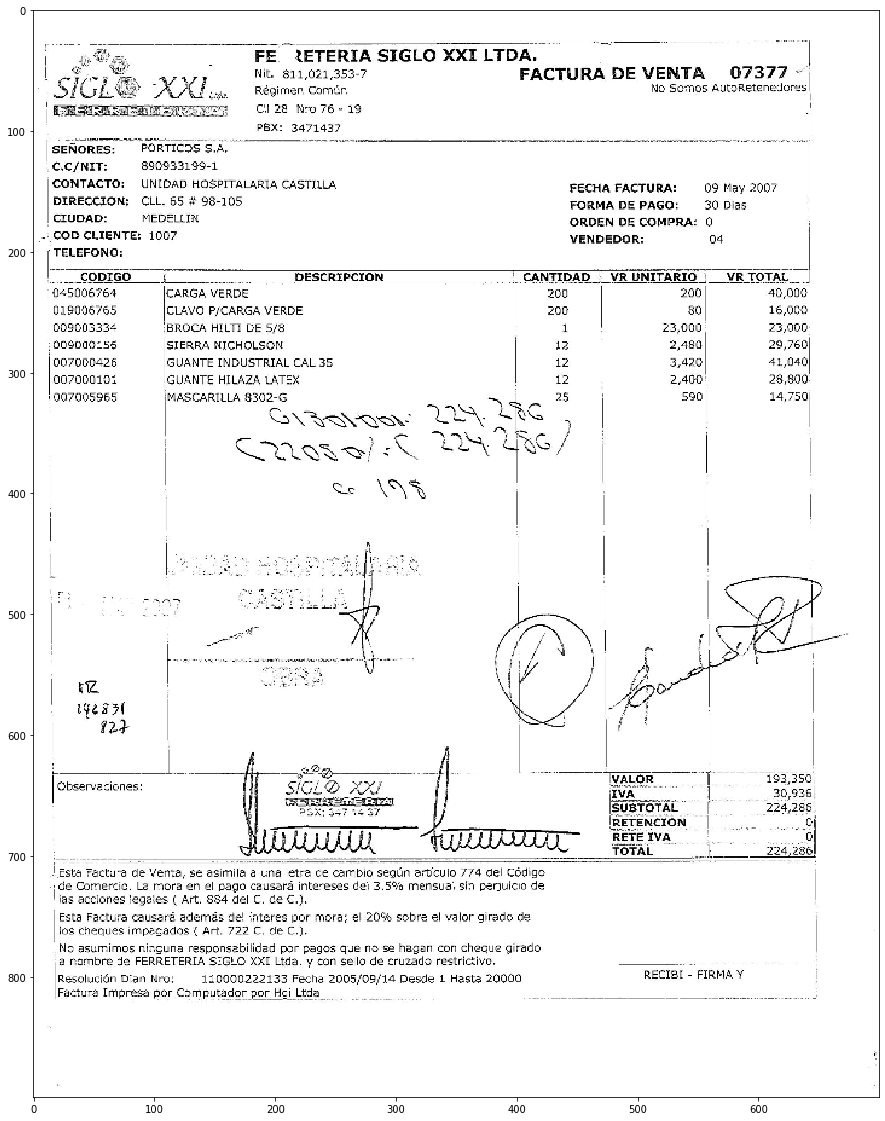

In [4]:
a = tf.io.read_file(file)
b = tf.image.decode_jpeg(a)
#reshape_image = tf.expand_dims(b, 0)
resized_image = tf.image.resize(b, size=[900, 700], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
resized_image
plt.imshow(resized_image.numpy())
#b.numpy  2750,2125
#c = tf.image.resize(b, size=[2750,2125])
#plt.imshow(c)

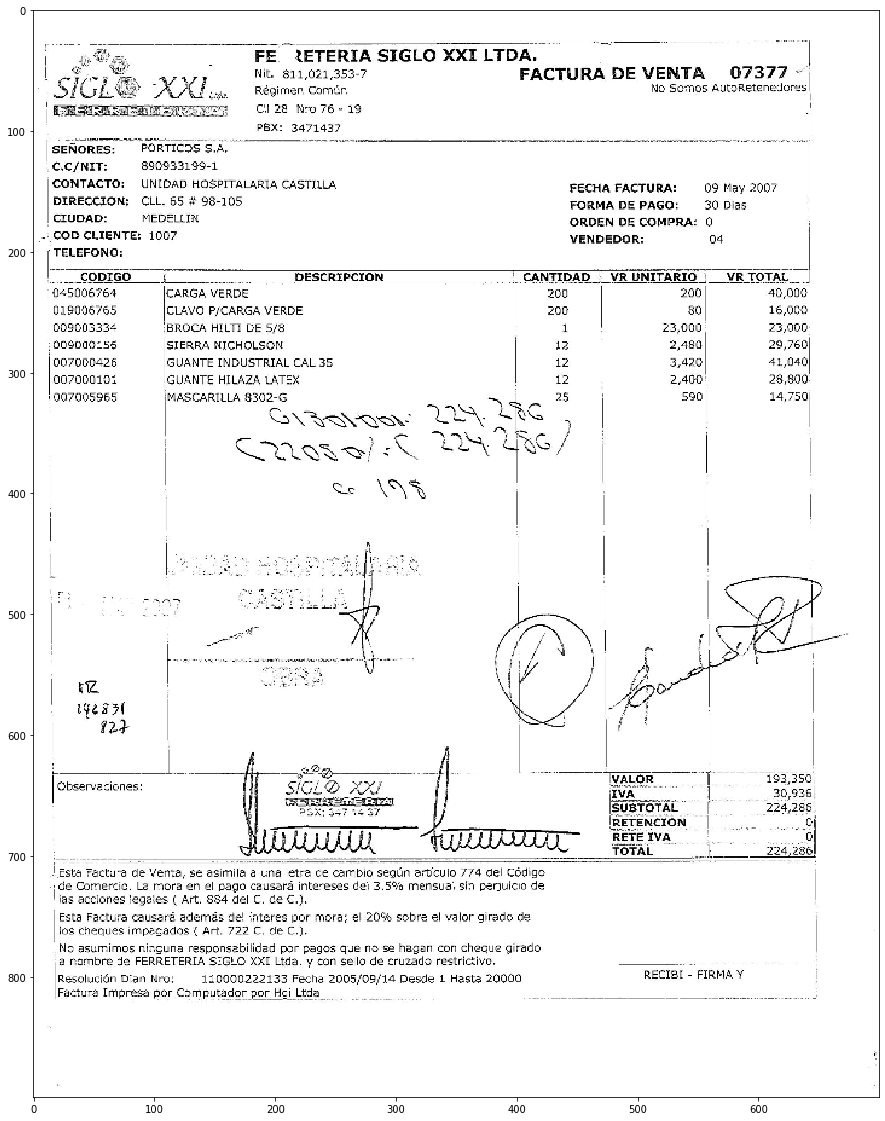

In [5]:
a = tf.io.read_file(file)
b = tf.image.decode_jpeg(a)
reshape_image = tf.expand_dims(b, 0)
resized_image = tf.image.resize(reshape_image, size=[900, 700], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
for e in resized_image:
    plt.imshow(e)

In [6]:
aa = resized_image.numpy()
plt.imshow(tf.keras.preprocessing.image.array_to_img(resized_image))

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

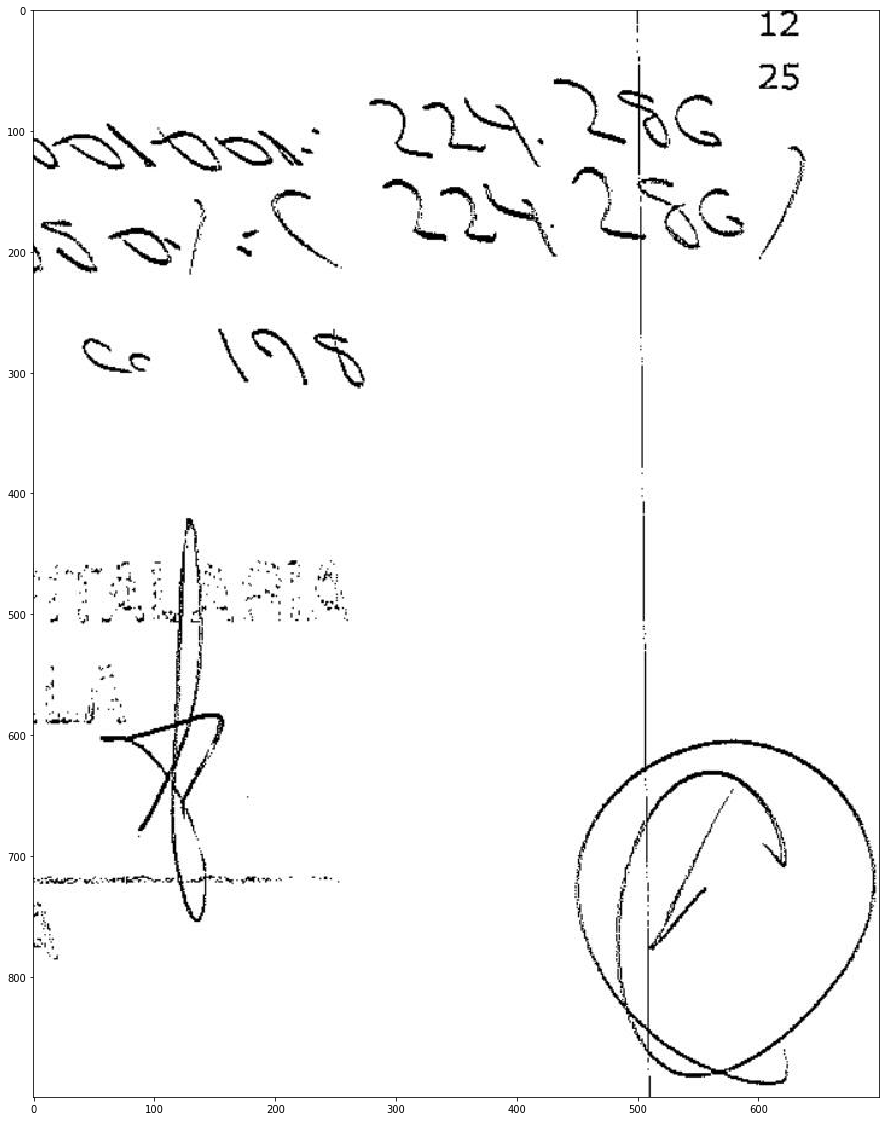

In [7]:
y = tf.io.read_file(file)
x = tf.image.decode_jpeg(y)
resize_image_with_crop_or_pad = tf.image.resize_with_crop_or_pad(x, target_height=900, target_width=700)
plt.imshow(resize_image_with_crop_or_pad)

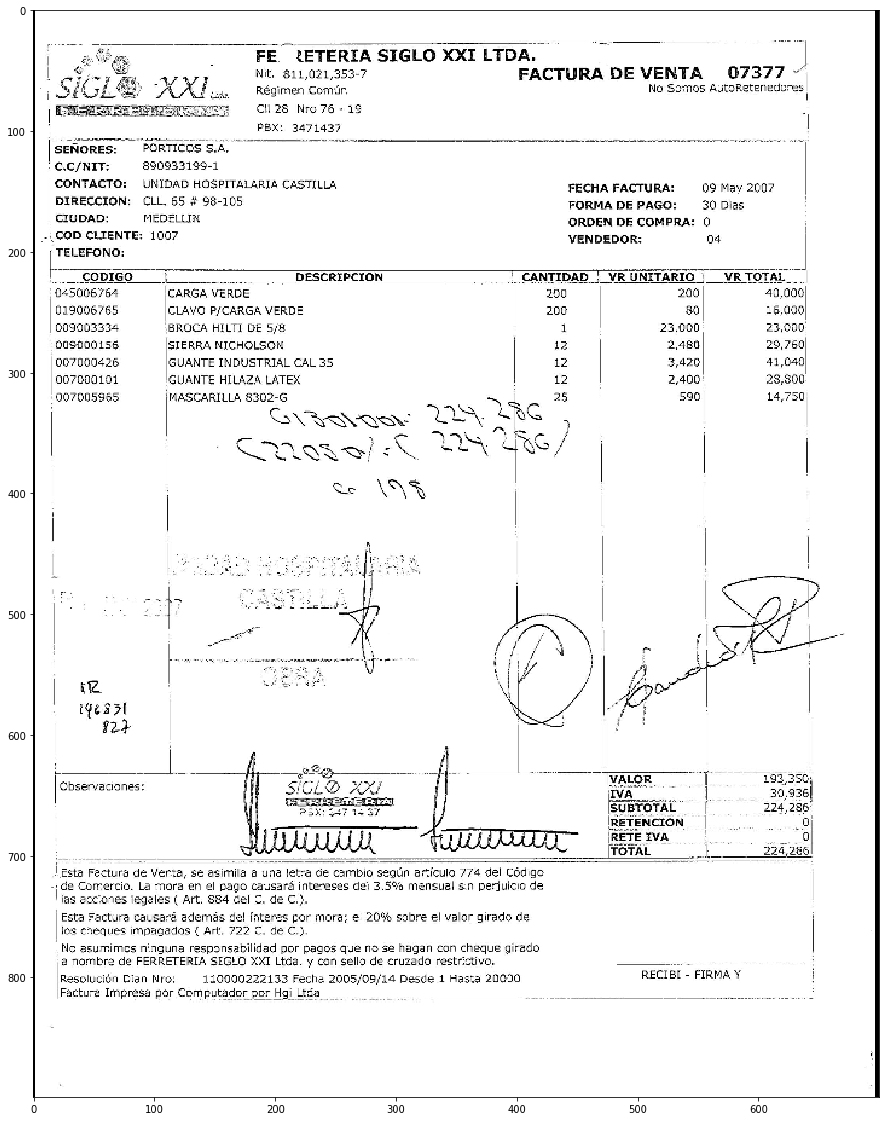

In [8]:
y = tf.io.read_file(file)
x = tf.image.decode_jpeg(y)
resize_image_with_crop_or_pad = tf.image.resize_with_pad(x, target_height=900, target_width=700, 
                                                         method="nearest")
plt.imshow(resize_image_with_crop_or_pad)

In [2]:
#ya que verifiqué el preprocesamiento de la imagen para no perdida intensiva de datos, 
#sigue la construcción del tfrecords

Usar keras para levantar las imagenes desde un directorio

Found 11 images belonging to 2 classes.


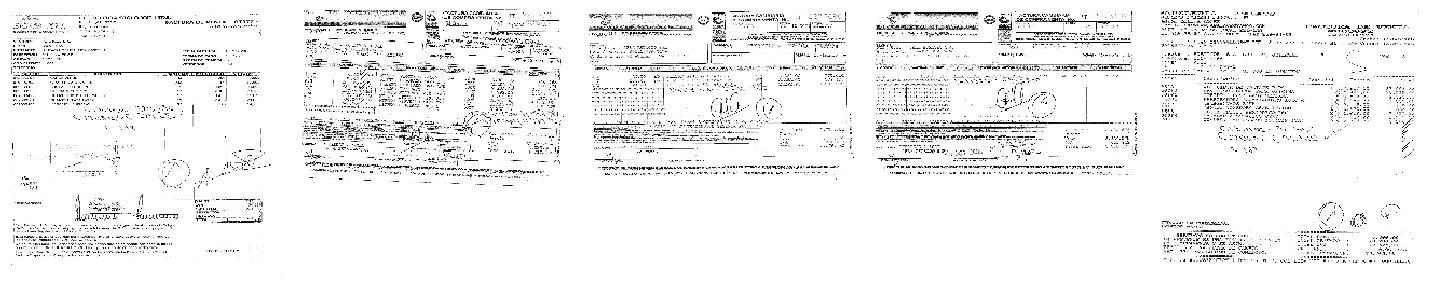

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
x = datagen.flow_from_directory(directory='/vision/data/invoices', class_mode='binary', shuffle=True, )
#Visualizar las imagenes
sample, label = next(x)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

plotImages(sample[:5])

In [7]:
sample[:5].shape

(5, 256, 256, 3)

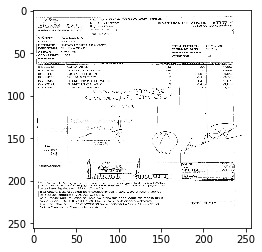

In [10]:
plt.imshow(sample[0])

Split las imgenes

In [24]:
files = pl.Path('../data/invoices')
[print(fl) for fl in files.glob('*')]

../data/invoices/2
../data/invoices/1


[None, None]

In [27]:
list_ds = tf.data.Dataset.list_files(str(files/'*/*'))
for f in list_ds.take(8):
  print(f.numpy())

b'../data/invoices/2/24.jpg'
b'../data/invoices/2/23.jpg'
b'../data/invoices/2/21.jpg'
b'../data/invoices/2/25.jpg'
b'../data/invoices/1/15.jpg'
b'../data/invoices/1/12.jpg'
b'../data/invoices/1/16.jpg'
b'../data/invoices/1/13.jpg'


In [45]:
DATASET_SIZE = 6

train_size = int(0.5 * DATASET_SIZE)
val_size = int(0.3 * DATASET_SIZE)
test_size = int(0.2 * DATASET_SIZE)

dataset = tf.data.Dataset.range(DATASET_SIZE) 
ds_train = dataset.take(train_size)
ds_test = dataset.skip(train_size)
ds_val = ds_test.skip(test_size)
ds_test = ds_test.take(test_size)
list(ds_train.as_numpy_iterator())
list(ds_val.as_numpy_iterator())
list(ds_test.as_numpy_iterator())

[3]

In [58]:
x = datagen.flow_from_directory(directory='/vision/data/invoices1', shuffle=True, batch_size=10)

Found 1542 images belonging to 9 classes.


In [63]:
s, l = next(x)

In [60]:
l.shape

(10, 9)

In [64]:
l

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [62]:
s.shape

(10, 256, 256, 3)

Ahora la tarea es verificar que hace creartfrecords3.py

In [ ]:
%run ../code/create_tfrecords4.py

In [2]:
ds = tf.data.TFRecordDataset('../data/invoices_val.tfrecord')
ds

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [3]:
for element in ds.take(1):
    print(repr(element))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\x90\xfd#\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x00\n\xfc\xfc#\n\timage_raw\x12\xed\xfc#\n\xe9\xfc#\n\xe5\xfc#\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xfa\x00\xfa\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\n\xbe\x08M\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x9

In [6]:
def parse_function(tensor_string):
    """ 
    Decode a serialized tensor
    That takes a image_dicts normalize and returns a tuple (x,y)
    Returns a x(image) to decode
    """
    feature_decode = {
        'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0)}

    img_dic = tf.io.parse_single_example(tensor_string, feature_decode)
    
    label= img_dic['label']
#    image = tf.io.parse_tensor(serialized=img_dic["image_raw"], out_type=tf.uint8) # era tf.string
    image = img_dic['image_raw']

    return image, label

In [7]:
dsi = ds.map(parse_function)
dsi

<MapDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [8]:
dsi

<MapDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [7]:
a1 = tf.io.read_file(filename=file)
a1

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xfa\x00\xfa\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\n\xbe\x08M\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


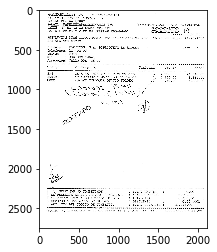

In [19]:
for e, y in dsi.take(2):
    print(plt.imshow(tf.image.decode_jpeg(e)))

In [ ]:
#Ejemplo cuando la imagen viene de numpy ya decodificada
for e, y in dsi.take(1):
    print(plt.imshow(e.numpy()))

In [28]:
for e, y in dsi.take(1):
    print(e)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xfa\x00\xfa\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\n\xbe\x08M\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2

https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d

In [ ]:
for e , y in dsi.take(1):
    img = tf.keras.preprocessing.image.img_to_array(e)
    plt.imshow(img)

In [24]:
img = tf.keras.preprocessing.image.load_img(file)

In [26]:
img1 = tf.keras.preprocessing.image.img_to_array(img)

In [27]:
img1

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [4]:
%run /vision/code/images_mlp.py

Epoch 1/3
      1/Unknown - 0s 472ms/step

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 102: invalid start byte

In [16]:
ds_train = tf.data.TFRecordDataset('/vision/data/invoices_train.tfrecord')
ds_train

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [17]:
def parse_invoices(tensor_string):
    """ 
    Decode a serialized tensor
    That takes a image_dicts normalize and returns a tuple (x,y)
    Returns a x(image) to decode
    """
    feature_decode = {
        'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0)}

    img_dic = tf.io.parse_single_example(tensor_string, feature_decode)
    
    label= img_dic['label']
    image = tf.image.decode_jpeg(img_dic['image_raw'])

    return {'image': image, 'label': label}

In [18]:
ds_train = ds_train.map(parse_invoices)

In [19]:
def preprocess_data(image_dic):
    """  
    Function that takes a image_dic, normalized (divided by 255) and returns a tupe (x, y)
    """

    image, label = image_dic['image'], image_dic['label']

    # image = tf.image.decode_jpeg(image)
    image.set_shape([None, None, None]) #+
    image = tf.math.divide(image, 255)
    image = tf.image.resize(image, [224, 224])
    image = tf.reshape(image, [224*224*3])

    return image, label

In [20]:
ds_train = ds_train.map(preprocess_data)

In [21]:
ds_train

<MapDataset shapes: ((150528,), ()), types: (tf.float32, tf.int64)>

In [22]:
inputs = tf.keras.Input(shape=(224*224*3), name='Hiraganas')
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization(renorm=True)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization(renorm=True)(x)
outputs = tf.keras.layers.Dense(210, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
# "sparse me sirve para clasificacion mutuamente excluyente un label --- multilabel"
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hiraganas (InputLayer)       [(None, 150528)]          0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                9633856   
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 210)               6930      
Total params: 9,643,538
Trainable params: 9,643,058
Non-trainable params: 480
_______________________________________________

In [24]:
ds_train = ds_train.shuffle(buffer_size=300).batch(32)

In [25]:
history = model.fit(ds_train, epochs=3)

Epoch 1/3
1/1 [==============================] - 1s 713ms/step - loss: 5.3405 - acc: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 223ms/step - loss: 67.8687 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 208ms/step - loss: 97.2436 - acc: 0.0000e+00


In [27]:
%run /vision/code/images_mlp.py

ValueError: in converted code:

    /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/engine/training_utils.py:582 standardize_input_data
        str(data_shape))

    ValueError: Error when checking input: expected Hiraganas to have shape (150528,) but got array with shape (1,)
